In [1]:
!pip install scipy

distributed 1.21.8 requires msgpack, which is not installed.


# AgglomerativeClustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [5]:
x = df.iloc[:,2:].values
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [6]:
import scipy.cluster.hierarchy as hc # for clustering
# same as numpy

Text(0,0.5,'Euclidean Distance')

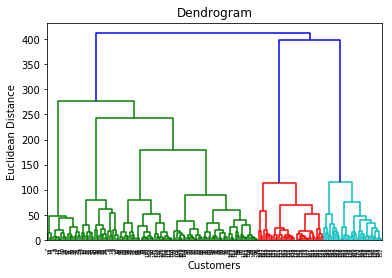

In [7]:
dendrogram = hc.dendrogram(hc.linkage(x,method='ward'))
# ward is another linkage like single, complete
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

In [9]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

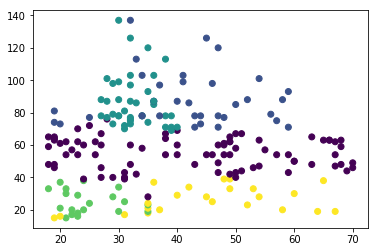

In [10]:
plt.scatter(x[:,0], x[:,1], c=y_hc)

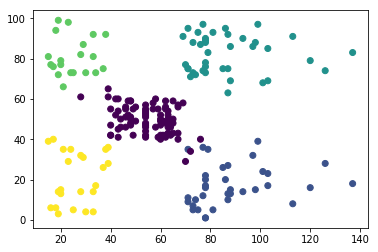

In [11]:
plt.scatter(x[:,1], x[:,2], c=y_hc)

# K Means

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=100 )

In [14]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
kmeans.inertia_ # Sum of Squared Errors

212840.16982097185

In [16]:
see_dict = {}
for i in np.arange(1,15,1):
    kmeans = KMeans(n_clusters=i, n_init=10, max_iter=100)
    kmeans.fit(x)
    see_dict[i] = kmeans.inertia_ 

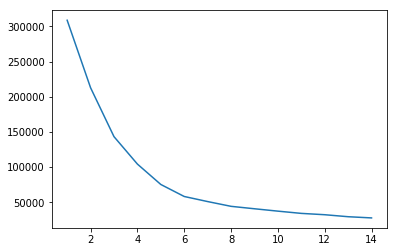

In [17]:
# Selecting number of clusters based on the plot
plt.plot(see_dict.keys(),see_dict.values())

In [18]:
kmeans_model = KMeans(n_clusters=6, n_init=10, max_iter=100)
kmeans_model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
y_km = kmeans_model.predict(x)

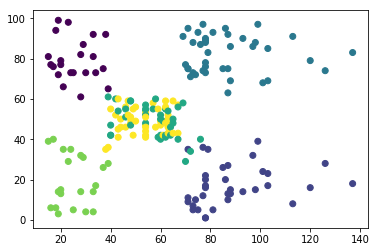

In [20]:
plt.scatter(x[:,1], x[:,2], c=y_km)

In [21]:
kmeans_model.cluster_centers_

array([[25.27272727, 25.72727273, 79.36363636],
       [41.68571429, 88.22857143, 17.28571429],
       [32.69230769, 86.53846154, 82.12820513],
       [27.        , 56.65789474, 49.13157895],
       [44.14285714, 25.14285714, 19.52380952],
       [56.15555556, 53.37777778, 49.08888889]])